In [169]:
import pandas as pd
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Komoran
from konlpy.tag import Kkma
from collections import Counter

okt = Okt()
komoran = Komoran()
kkma = Kkma()

# 불용어 리스트
region_nouns = ['경남','경상남도','창원','진주','통영','사천','김해','밀양','거제','양산','의령','함안','창녕','고성','남해','하동','산청','함양','거창','합천',
                '창원시','진주시','통영시','사천시','김해시','밀양시','거제시','양산시','의령군','함안군','창녕군','고성군','남해군','하동군','산청군','함양군','거창군','합천군',
                '진해','마산','부산','의창구','성산구','마산합포구','마산회원구','진해구','함양읍','고성시','고성읍','화개면','의령읍']
remove_nouns = ['여행','곳','것','때','그','이','안','더','보기','수', '전체', '화면',
                '해상도', '자동', '자막', '사용', '안함', '재생', '속도', '기본', '해상도', 
                '자동', '자막', '설정', '사용', '안함', '옵션', '글자', '크기', '배경', '색',
                '재생', '속도', '기본', '알', '오류', '발생', '도움말', '음소거', '상태', '도움말',
                '라이센스', '고화질', '재생', '영상', '설정', '해상도', '변경', '등','전', '난', '일'
                '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯','게', 
                '내', '말', '나', '거', '점', '만큼', '아', '으로', '던', '다', '에', '는', '가','저','길','날','최',
                '위','로','볼','바로','정말','우리','제','홍','층','관','시간','근교','동시','구시','읍','면','동','군','데이터',
                '부동산','지도','컨트롤러','범례','거리','도국','저희','때문','아주','장소','건물','준비', '지금', '타고', '이번', '주차장',
                '주차','추천','진짜','그냥','오늘','여기','소개','조금','예약','하나','무료','이용','주변','다음','정도','한번','시작',' 번길',
                '사람','생각','방문','입장료','다시','위해','가장','보고','근처','코스','모습','남고성','위치','숙소']

removal = set(region_nouns + remove_nouns)
nouns = []

df = pd.read_csv('/home/kng/kng/CRAWLER/blog.csv')


def remove(word_list):
    return [word for word in word_list if word not in removal]

for index, row in df.iterrows():
    nouns.append(okt.nouns(row['title'])+okt.nouns(row['content']))


In [170]:
words_df = pd.DataFrame({'region': df['region'], 'nouns': nouns, 'date': df['date']})

words_df

,region,nouns,date
0,창원,"[경남, 창원, 여행, 부산, 근교, 곳, 진해, 해양, 공원, 주말, 맞이, 창원...",20240311
1,창원,"[창원, 남, 저수지, 코스모스, 갈대, 돌다리, 경남, 둘레길, 여행, 경남, 둘...",20231101
2,창원,"[경남, 여행, 창원, 단감, 테마, 파크, 출발, 링크, 에스테, 부산광역시, 연...",20240425
3,창원,"[경남, 창원, 여행, 대산, 플라워, 랜드, 봄꽃, 개화, 상황, 창원, 대산, ...",20240530
4,창원,"[여행, 코프, 커피, 창원, 시립, 문신, 미술관, 베이스, 워터, 커피, 경남,...",20240607
...,...,...,...
1965,합천,"[경남, 합천, 여행, 곳, 합천, 영상, 테마, 파크]",20171126
1966,합천,"[경남, 합천, 여행, 곳, 영상, 테마, 파크, 경남, 여행, 합천, 영상, 테마...",20210924
1967,합천,"[경남, 합천, 여행, 곳, 청와대, 세트]",20161209
1968,합천,"[경남, 여행, 합천, 불, 탑, 진주, 근교, 드라이브, 코스, 여자친구, 박, ...",20220124


In [171]:
def str_to_list(s):
    return eval(s)

def remove_unnecessary_nouns(nouns_list, removal_list): # 불용어 제거
    return [noun for noun in nouns_list if noun not in removal_list and len(noun) != 1]

words_df['nouns'] = words_df['nouns'].apply(lambda x: remove_unnecessary_nouns(x, removal)) # 불용어 제거

words_df.to_csv('/home/kng/kng/CRAWLER/blog_filtered.csv', index=False)

In [172]:
words_df

,region,nouns,date
0,창원,"[해양, 공원, 주말, 맞이, 사실, 부담, 진해시, 마산시, 통합, 곳도, 타워,...",20240311
1,창원,"[저수지, 코스모스, 갈대, 돌다리, 둘레길, 둘레길, 코스모스, 갈대, 저수지, ...",20231101
2,창원,"[단감, 테마, 파크, 출발, 링크, 에스테, 부산광역시, 연제구, 명륜, 번길, ...",20240425
3,창원,"[대산, 플라워, 랜드, 봄꽃, 개화, 상황, 대산, 플라워, 랜드, 대산, 플라워...",20240530
4,창원,"[코프, 커피, 시립, 문신, 미술관, 베이스, 워터, 커피, 여행기, 지난, 야구...",20240607
...,...,...,...
1965,합천,"[테마, 파크]",20171126
1966,합천,"[테마, 파크, 테마, 파크, 대표, 주자, 볼거리, 곧바로, 검색, 황매산, 공원...",20210924
1967,합천,"[청와대, 세트]",20161209
1968,합천,"[드라이브, 여자친구, 일정, 가을, 해인사, 시내, 벽루, 첫날, 갑자기, 다른,...",20220124


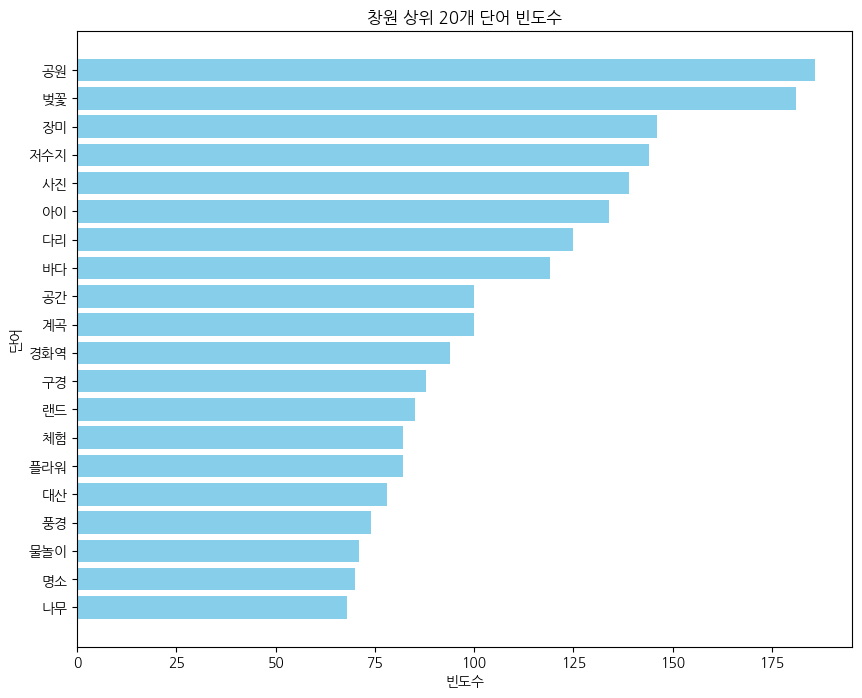

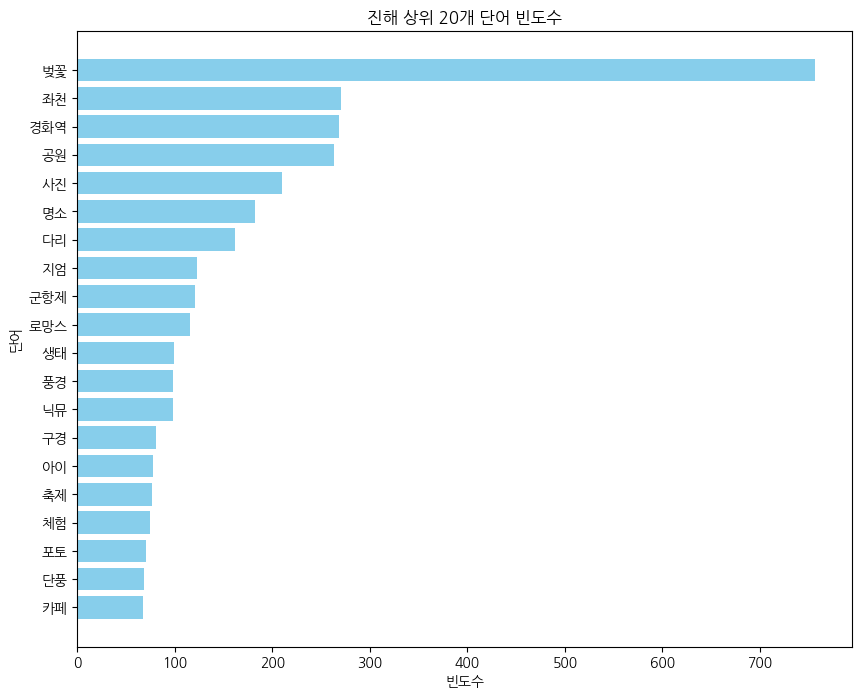

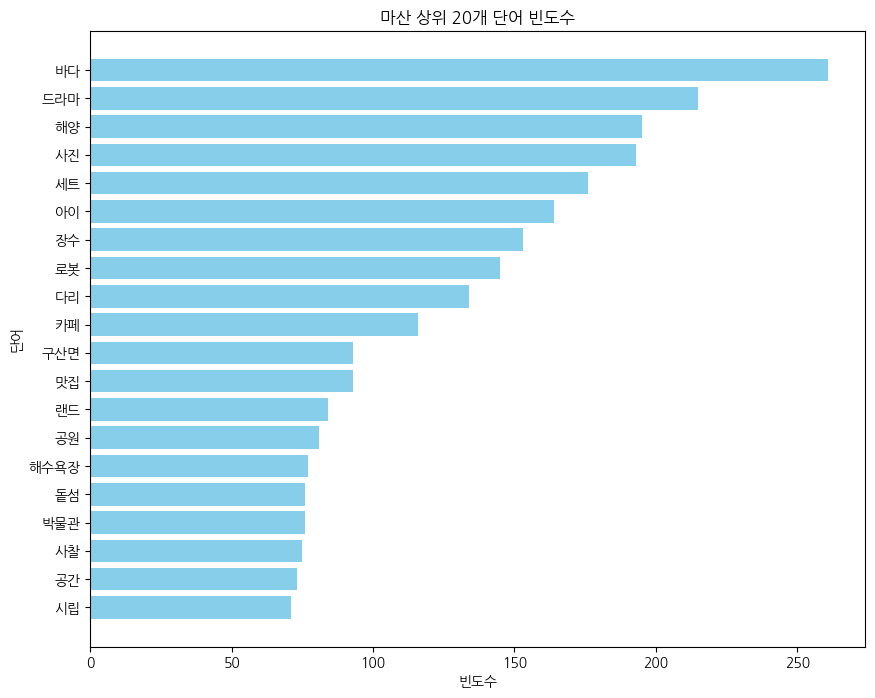

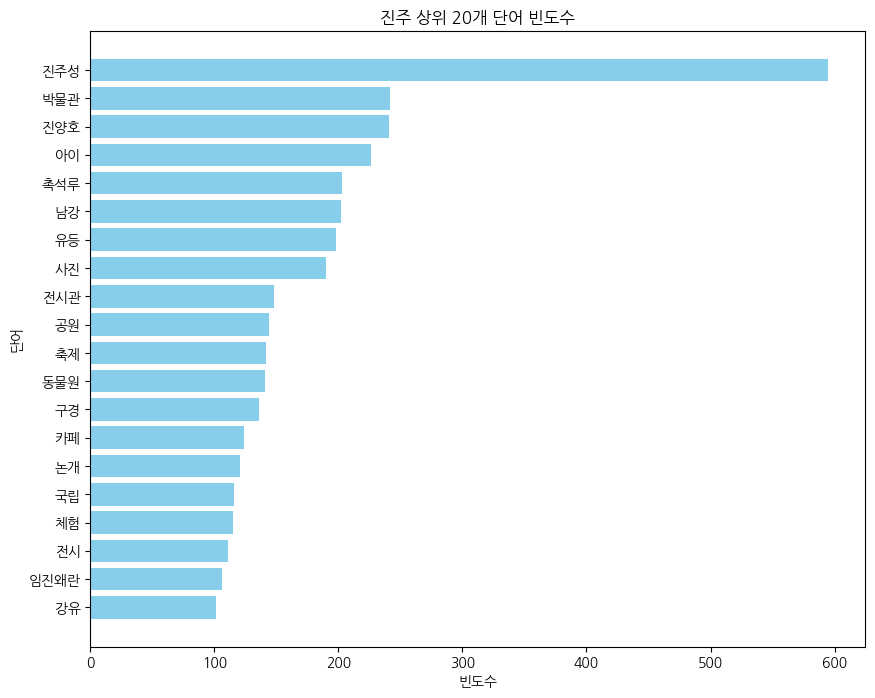

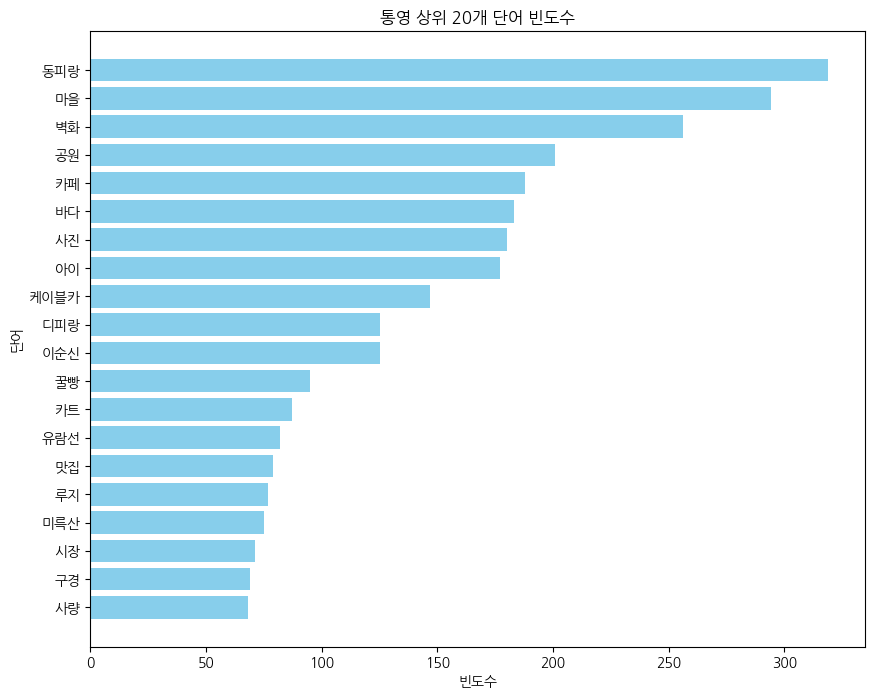

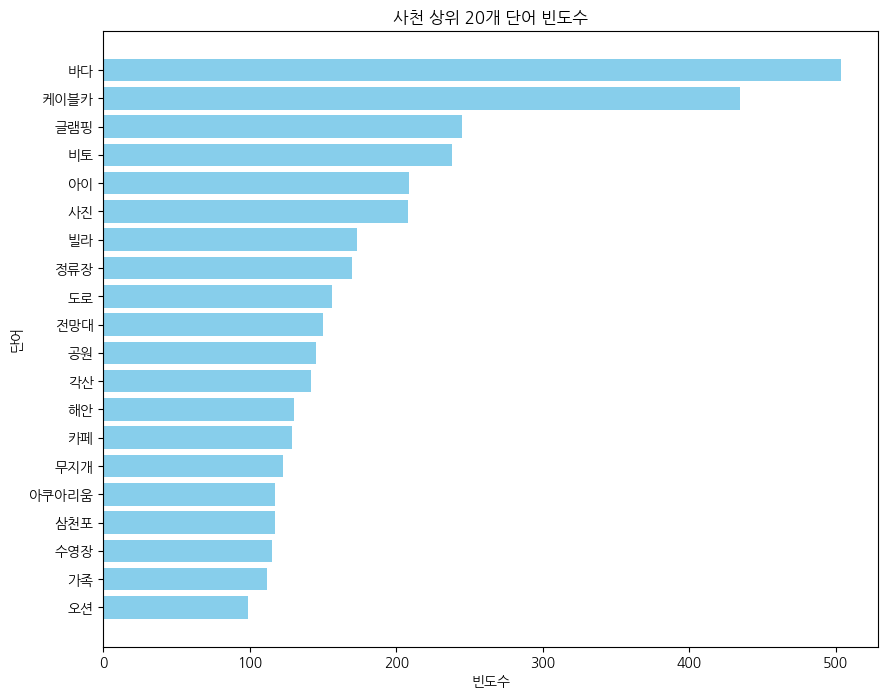

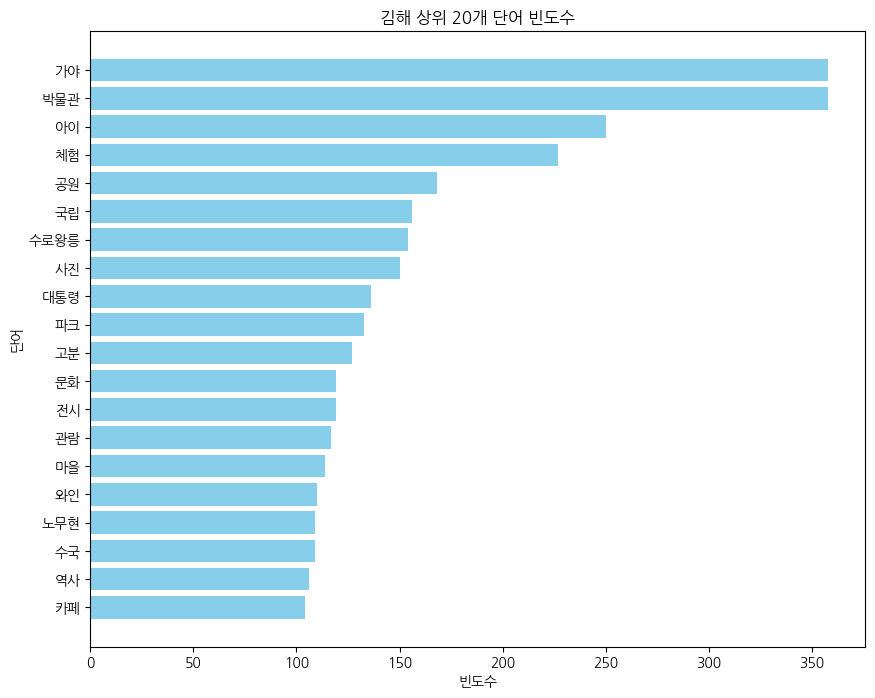

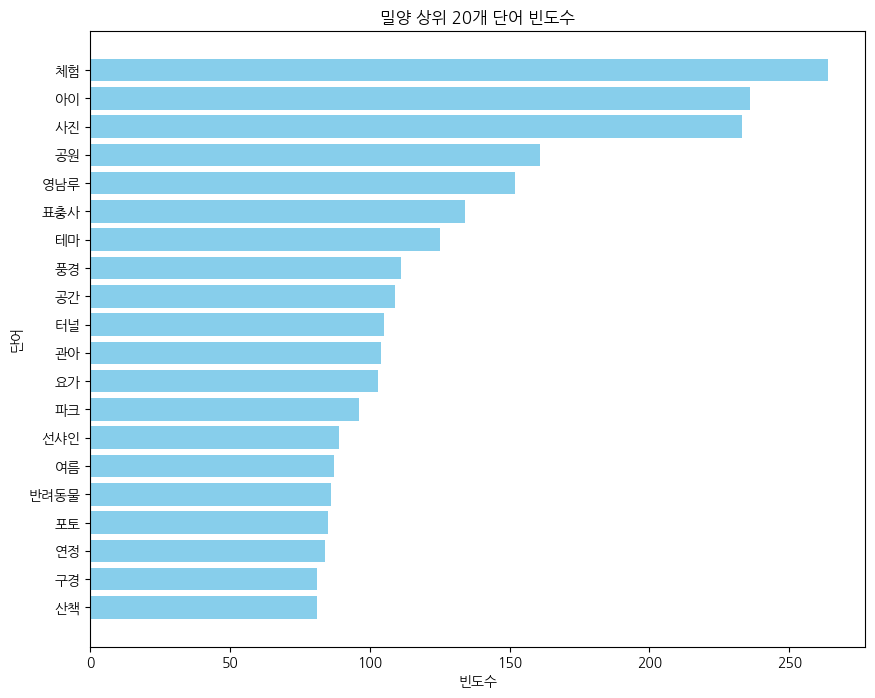

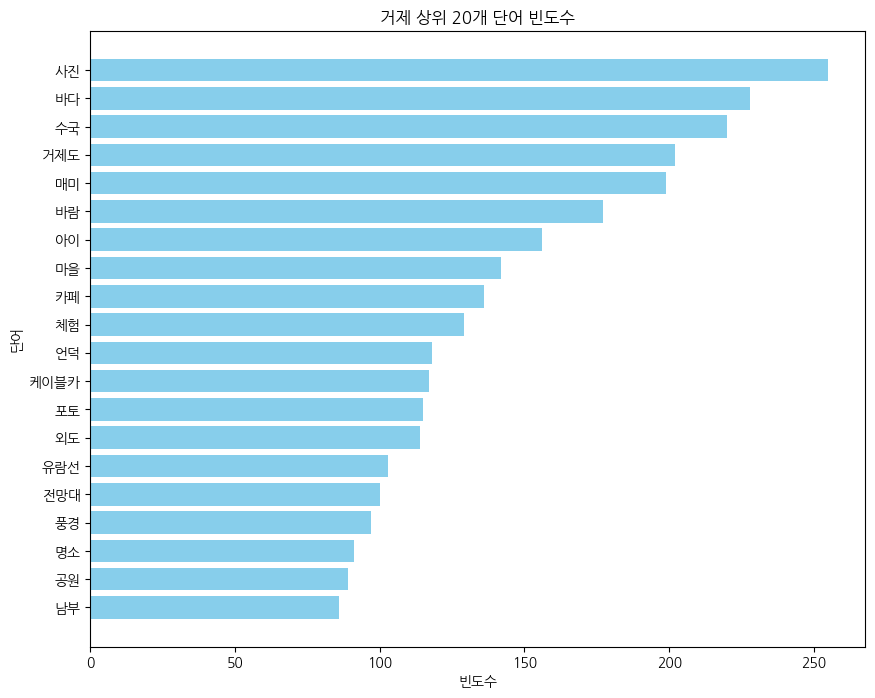

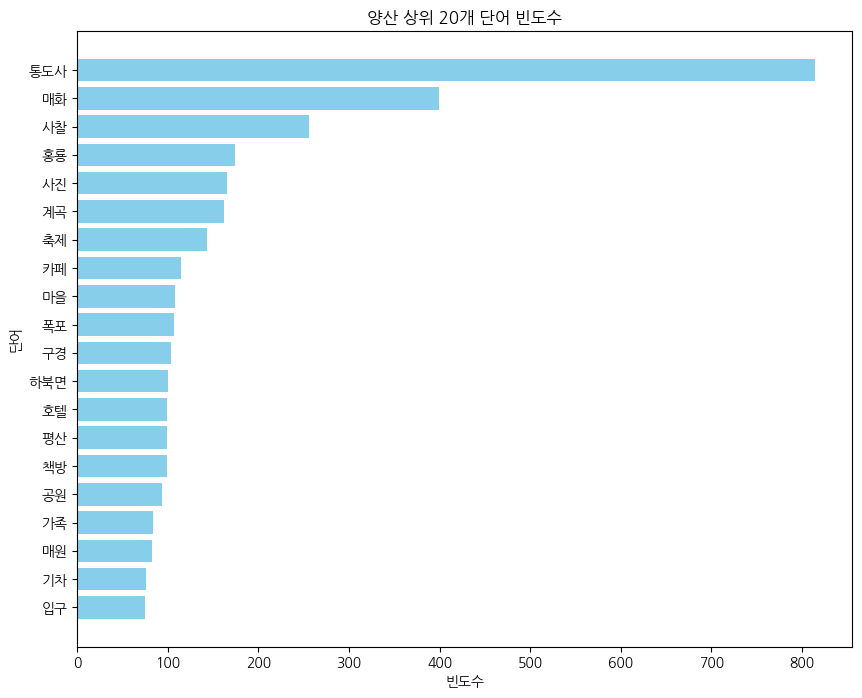

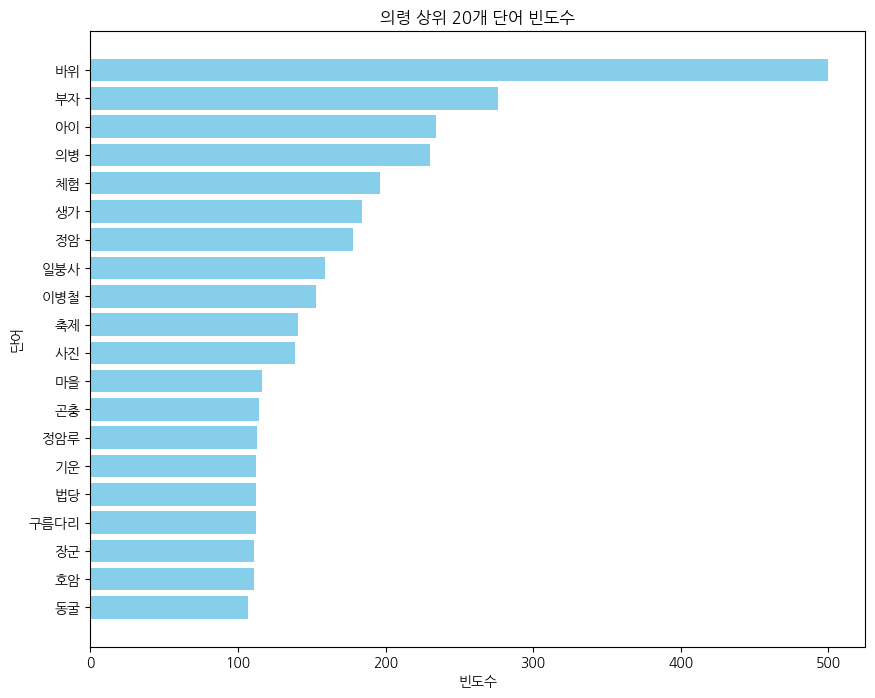

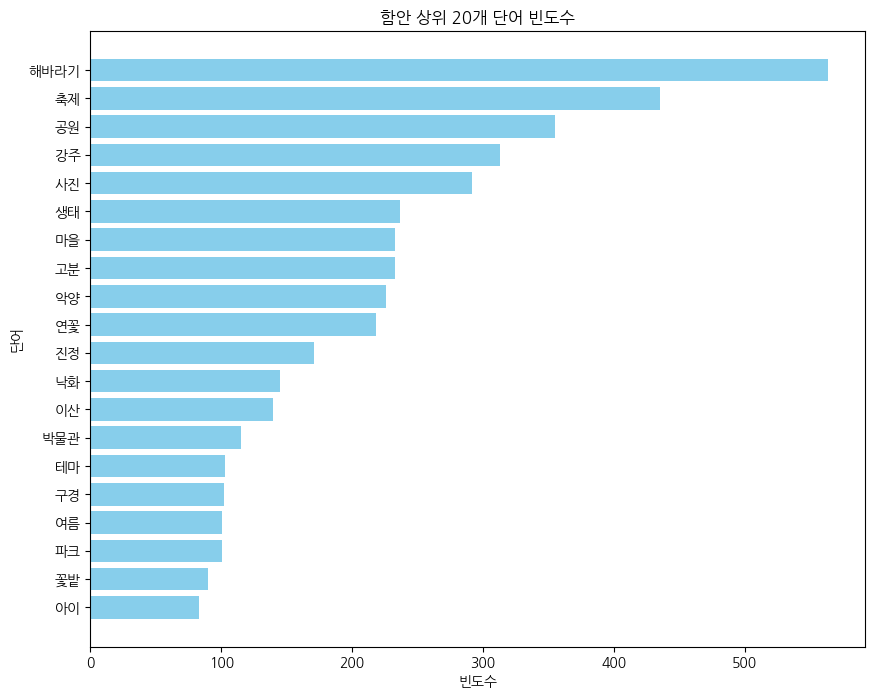

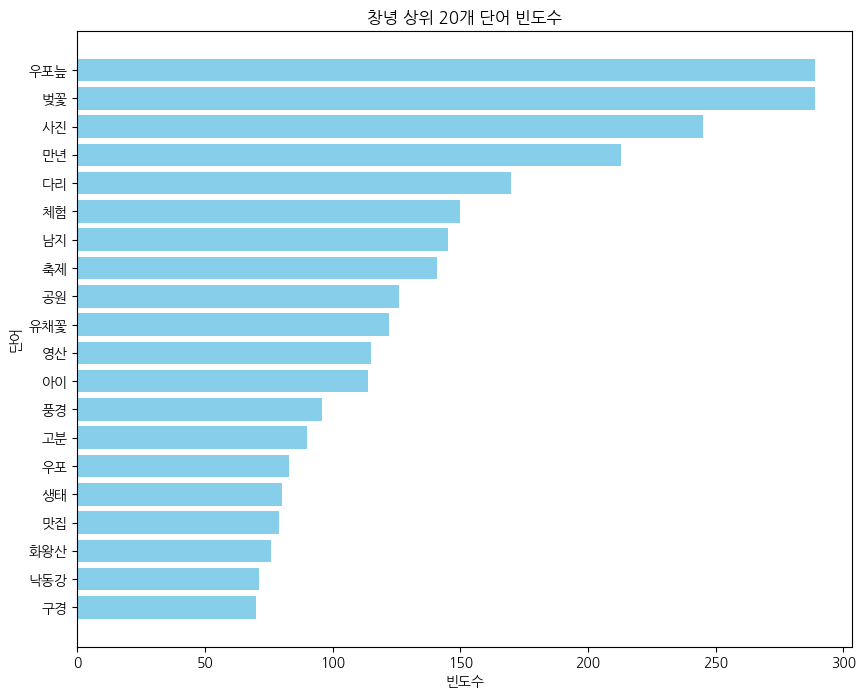

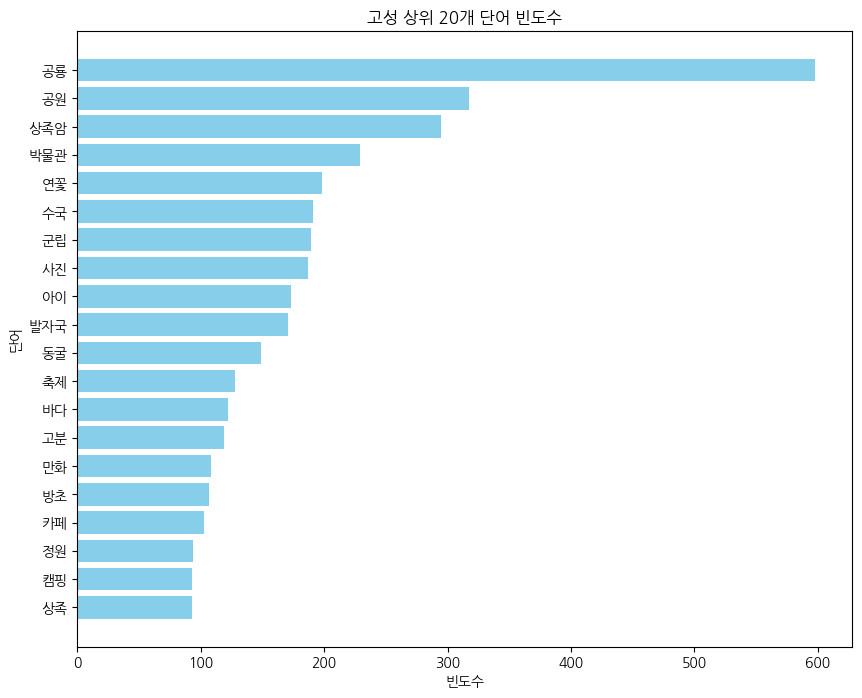

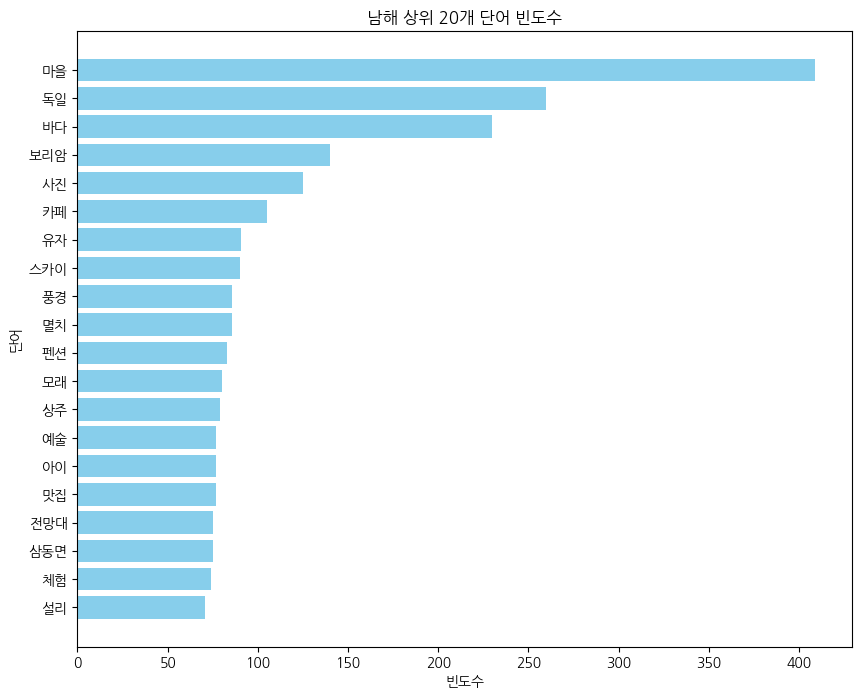

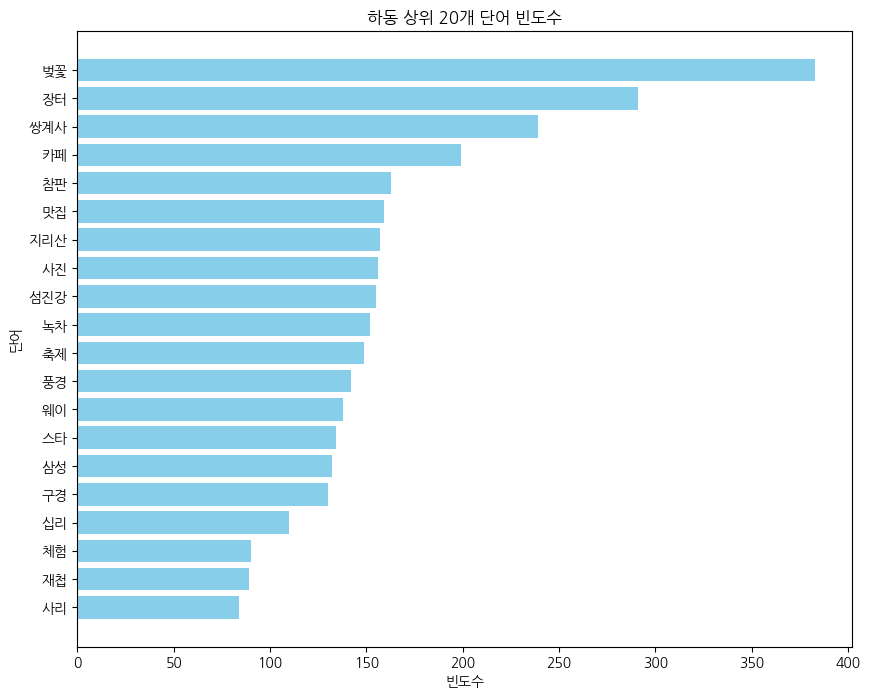

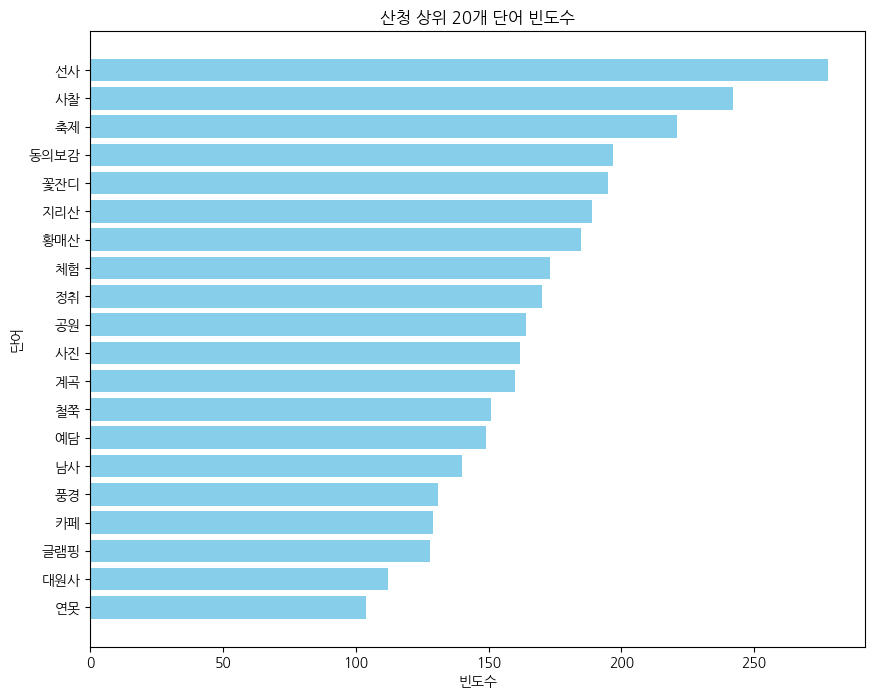

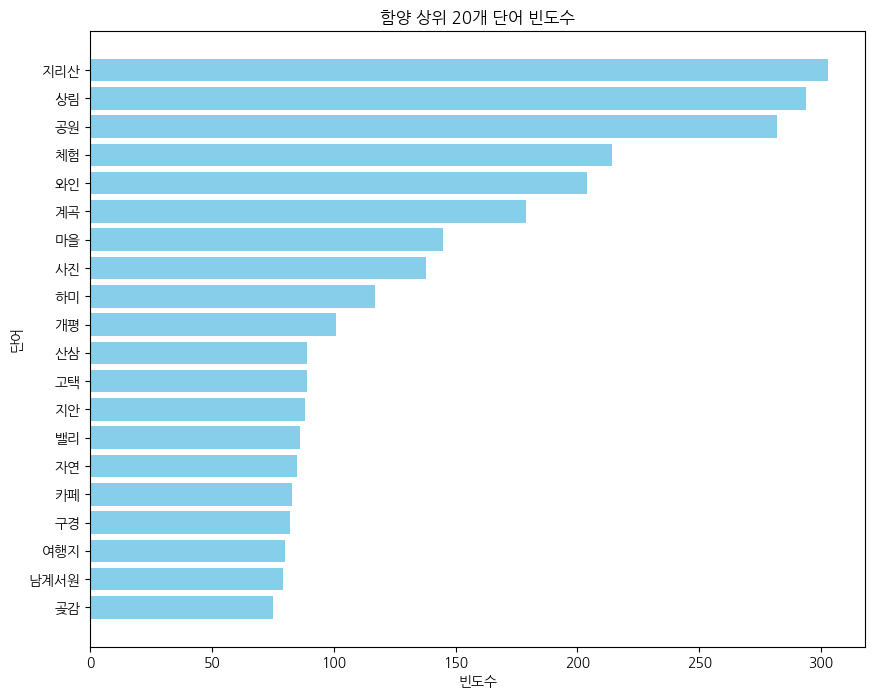

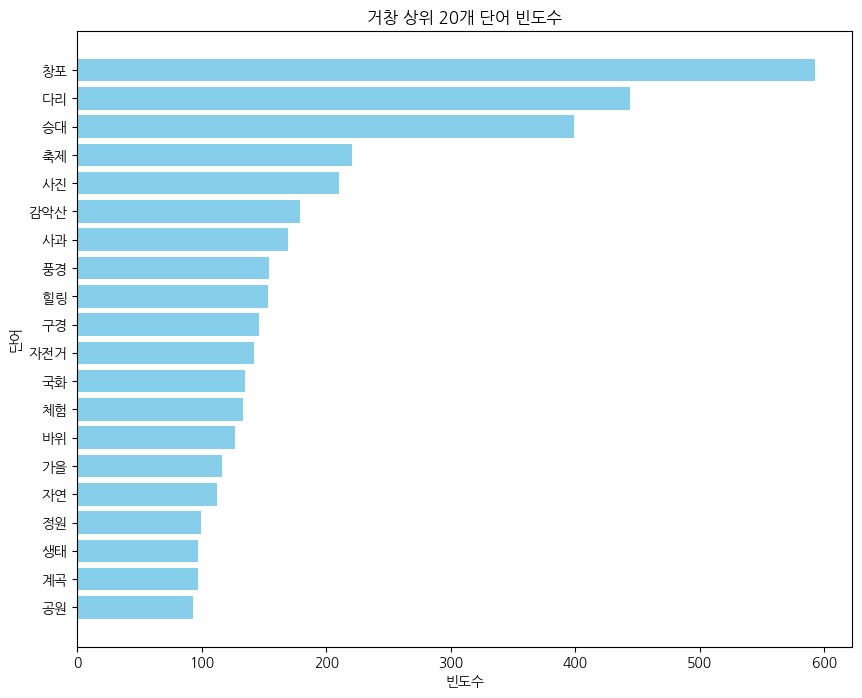

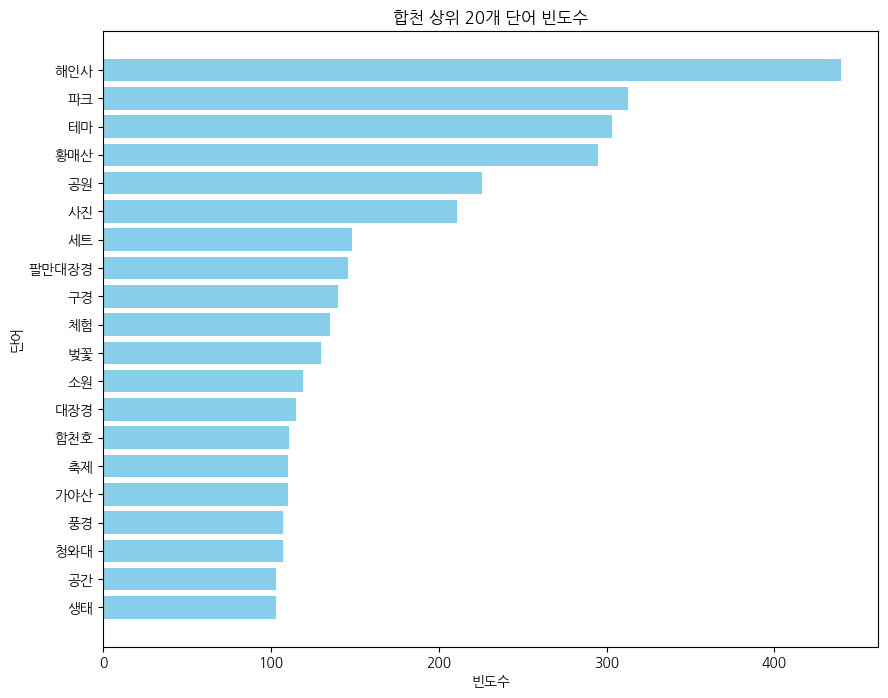

In [173]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 지역별로 단어 빈도수 계산 및 시각화
regions = words_df['region'].unique()
font_path = '/home/kng/kng/CRAWLER/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
for region in regions:
    # 해당 지역의 데이터 필터링
    region_df = words_df[words_df['region'] == region]
    
    # 모든 단어를 하나의 리스트로 합침
    all_nouns = [noun for sublist in region_df['nouns'] for noun in sublist]
    
    # 단어 빈도수 계산
    noun_counts = Counter(all_nouns)
    
    # 상위 20개 단어 추출
    top_nouns = noun_counts.most_common(20)
    
    # 데이터 분리
    words, counts = zip(*top_nouns)
    
    # 막대그래프
    plt.rc('font', family=font_name)
    plt.figure(figsize=(10, 8))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('빈도수')
    plt.ylabel('단어')
    plt.title(f'{region} 상위 20개 단어 빈도수')
    plt.gca().invert_yaxis()  # 상위 단어가 위로 오도록 설정
    plt.show()



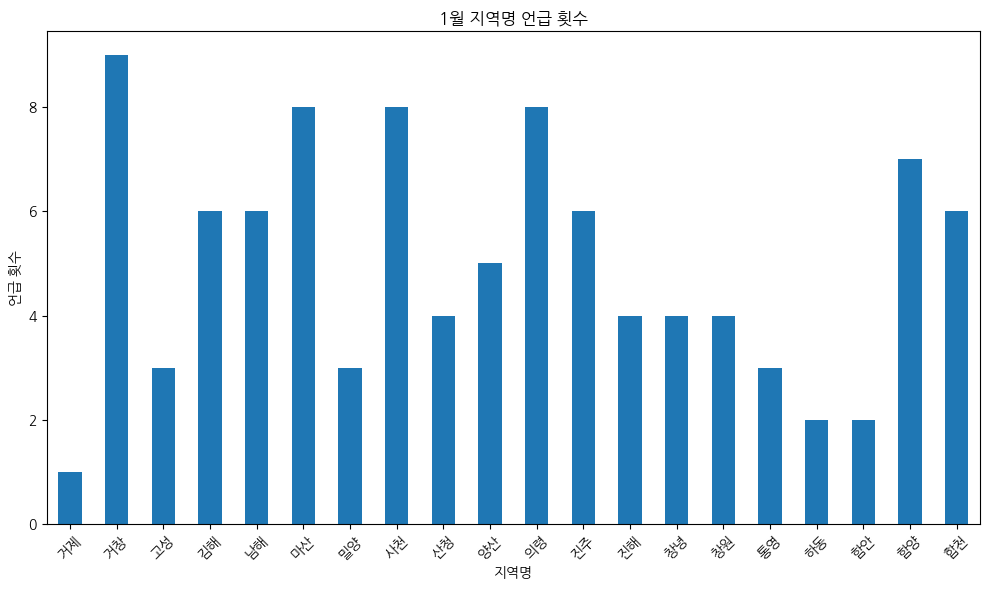

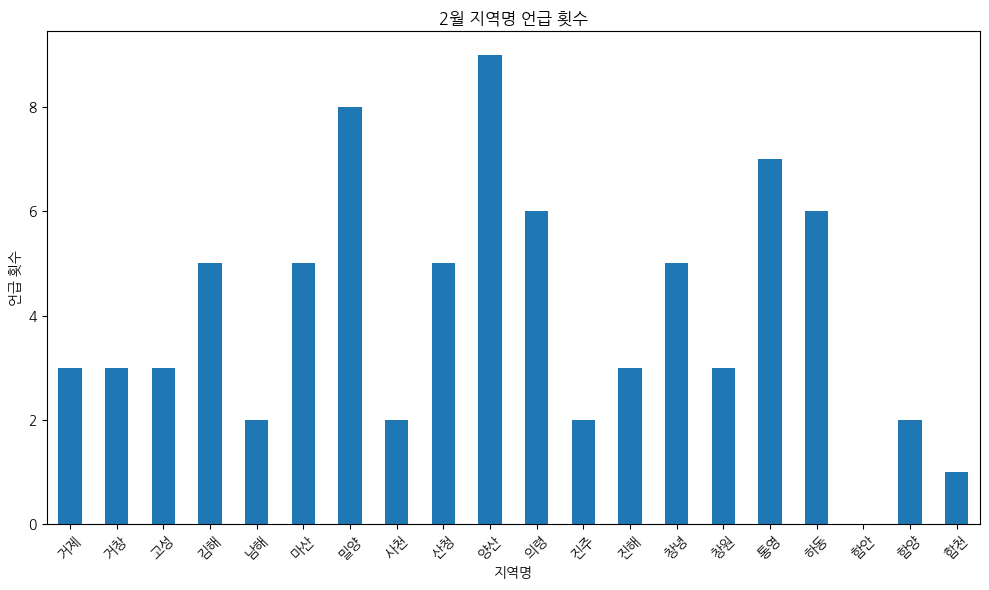

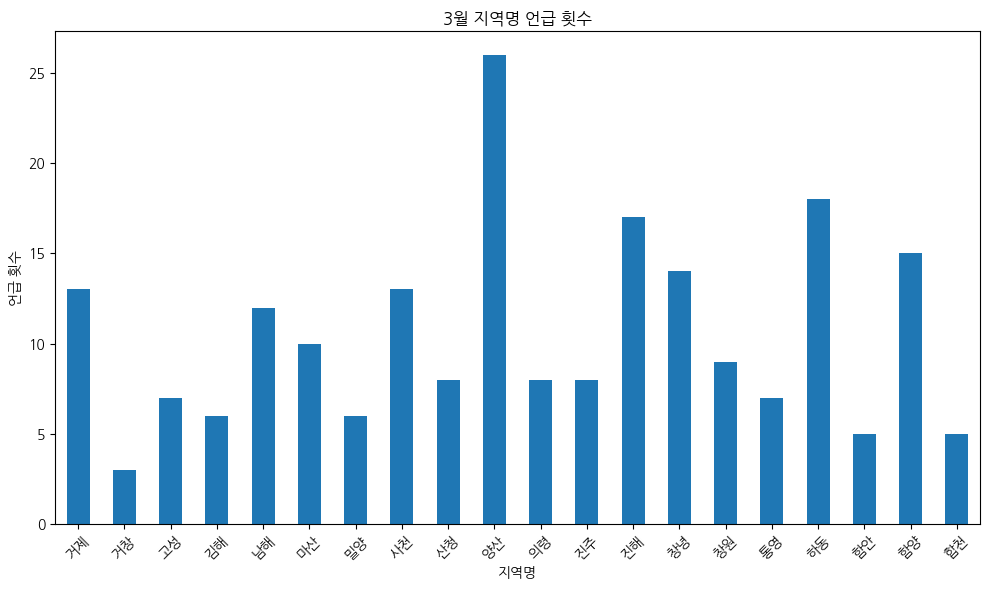

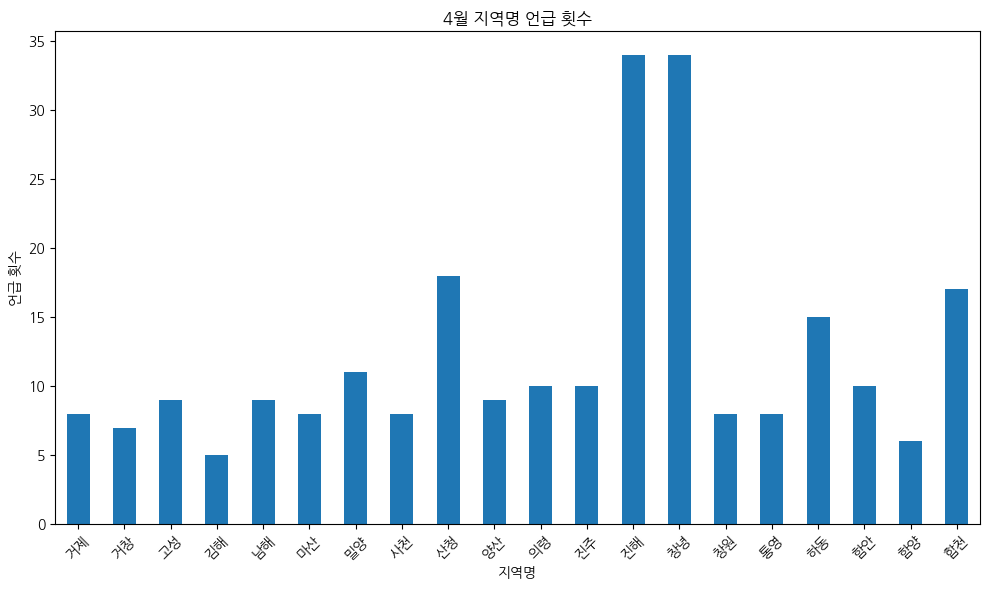

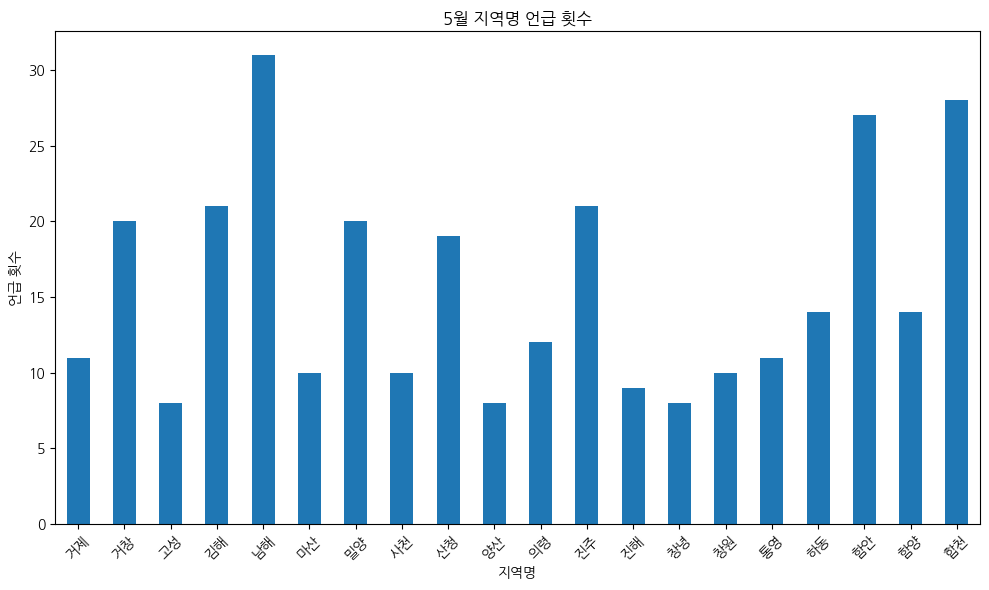

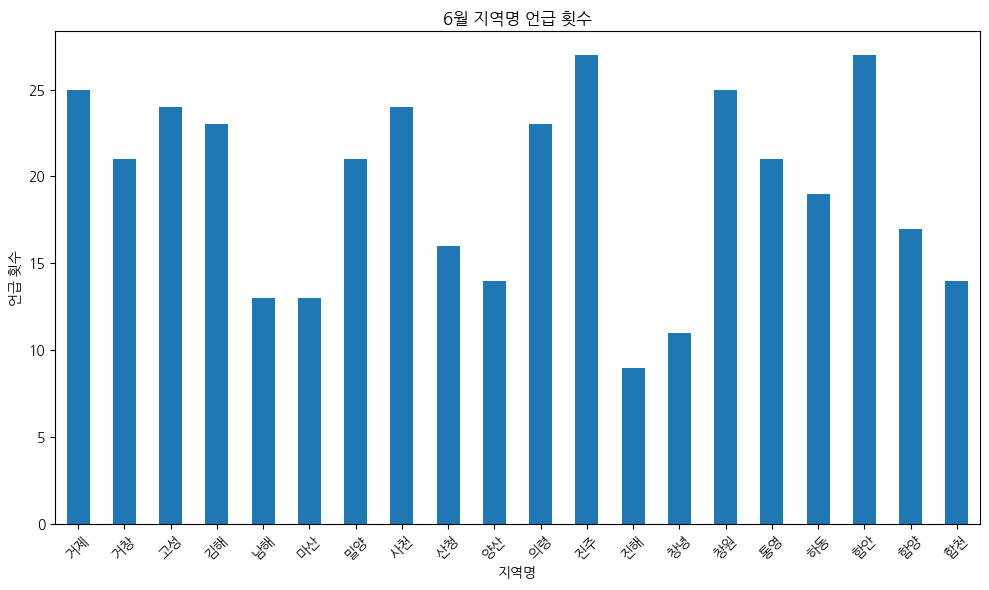

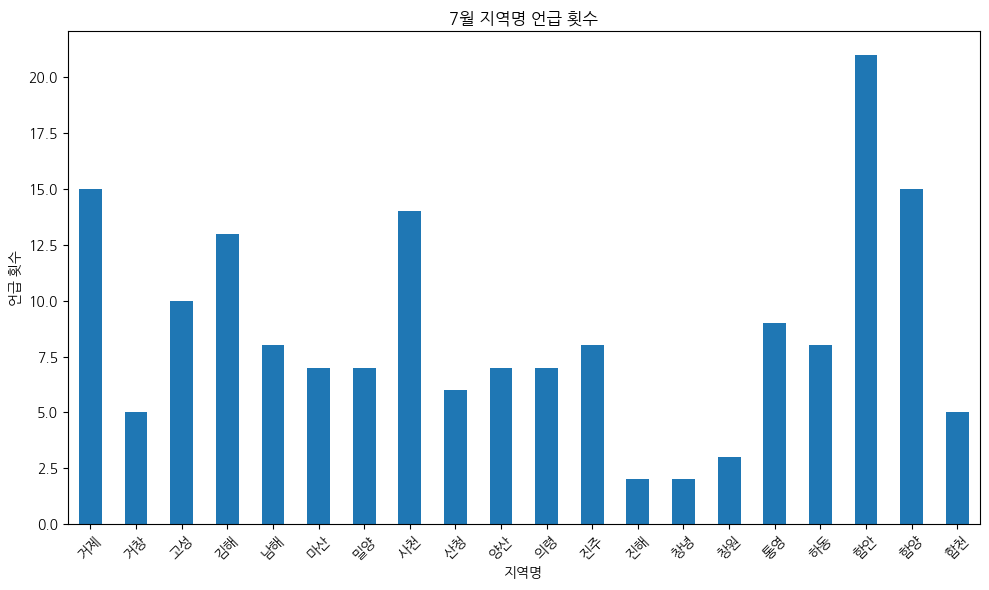

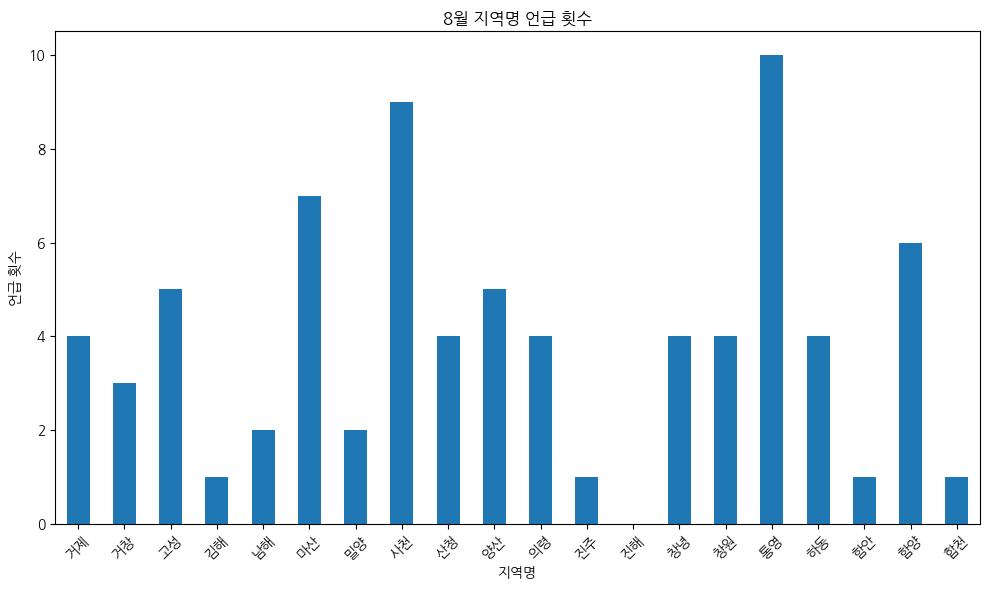

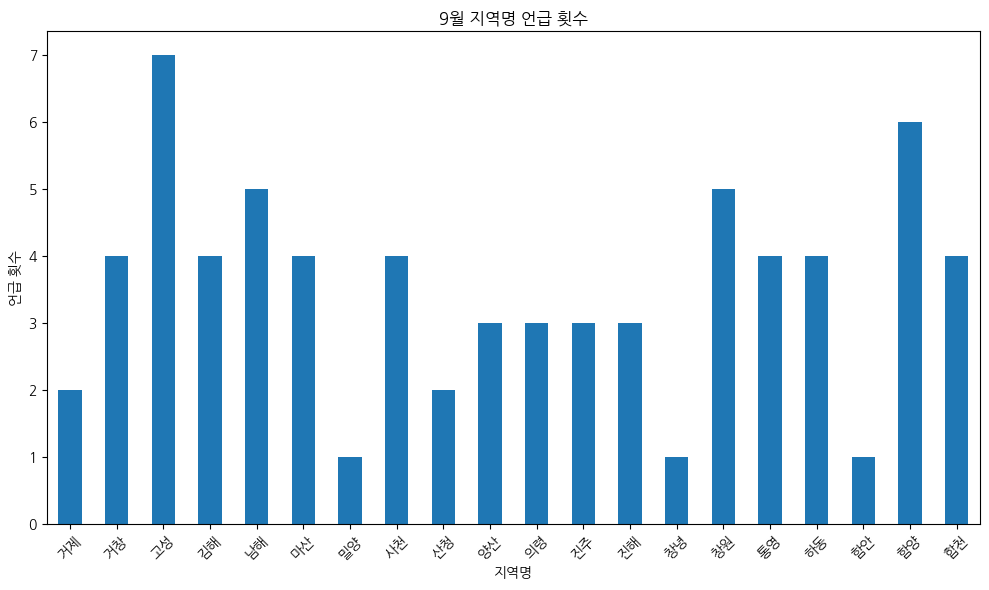

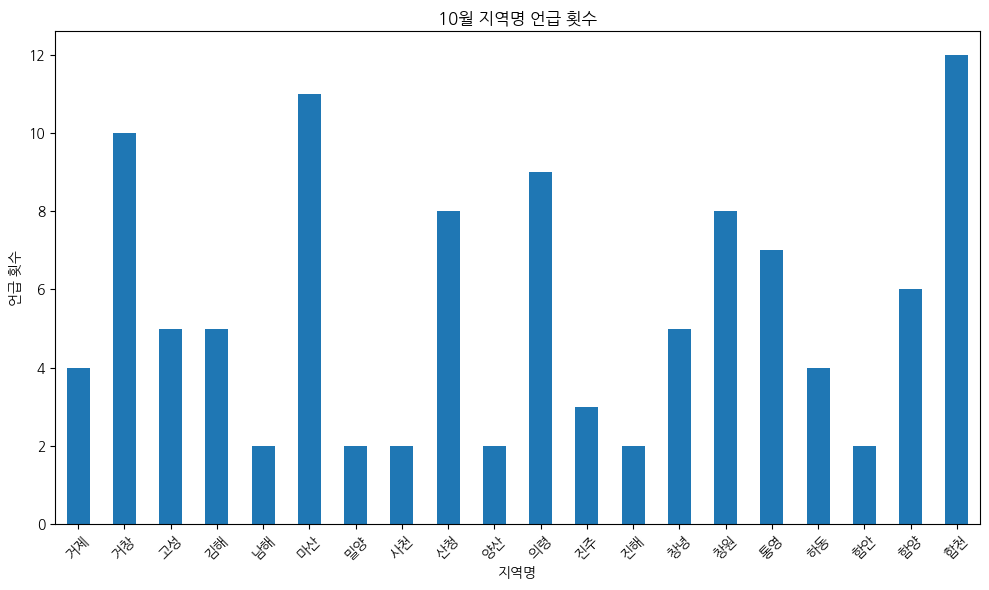

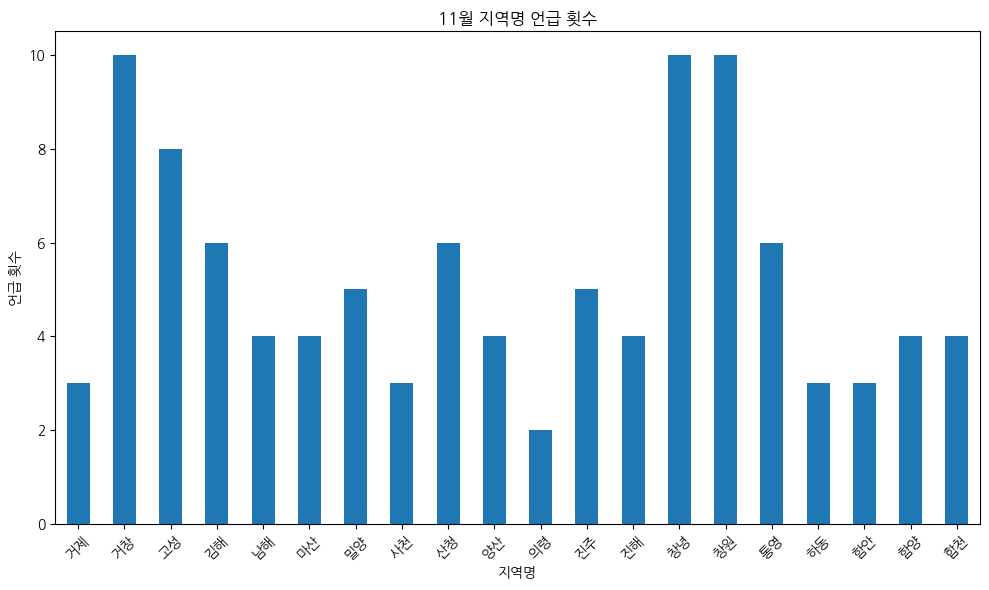

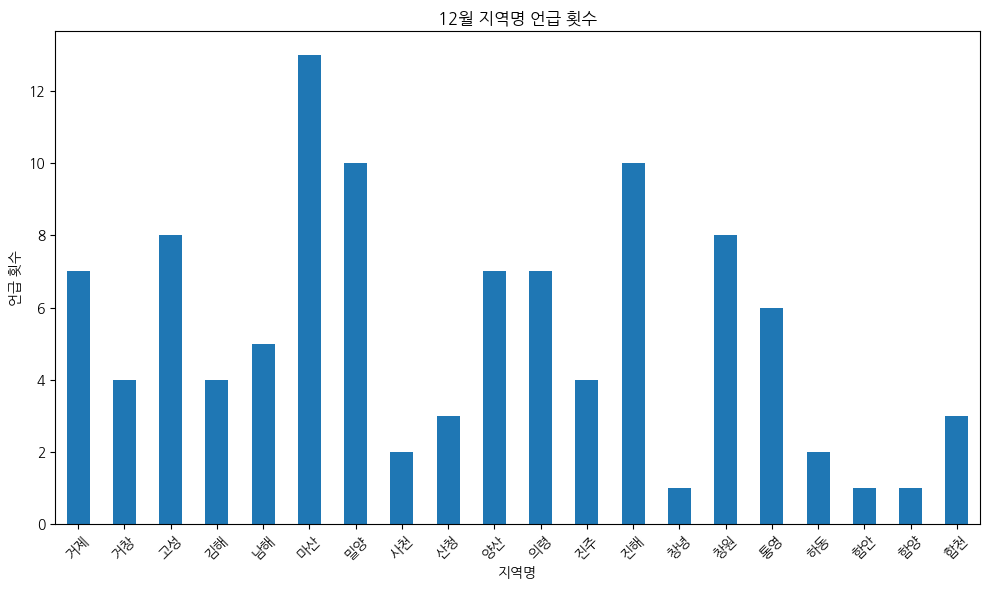

In [174]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 및 처리
data = pd.read_csv('/home/kng/kng/CRAWLER/blog_filtered.csv')

# 날짜를 datetime 형식으로 변환하고 월 추출
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data['month'] = data['date'].dt.month

# 월별 지역명 언급 횟수 계산
monthly_region_counts = data.groupby(['month', 'region']).size().unstack(fill_value=0)

# 각 월에 대한 그래프 생성
for month in range(1, 13):
    plt.figure(figsize=(10, 6))
    monthly_region_counts.loc[month].plot(kind='bar')
    plt.title(f'{month}월 지역명 언급 횟수')
    plt.xlabel('지역명')
    plt.ylabel('언급 횟수')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



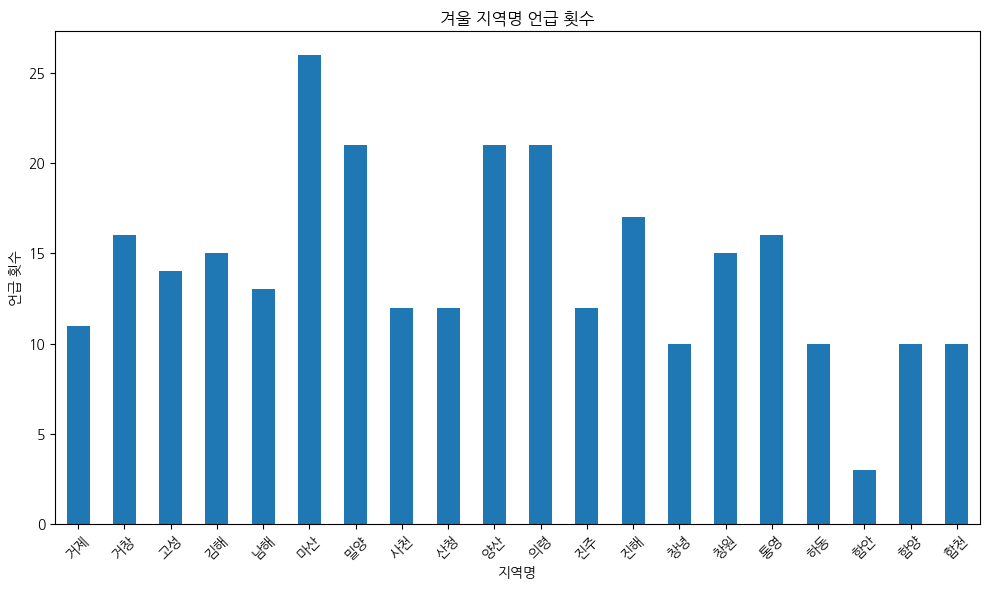

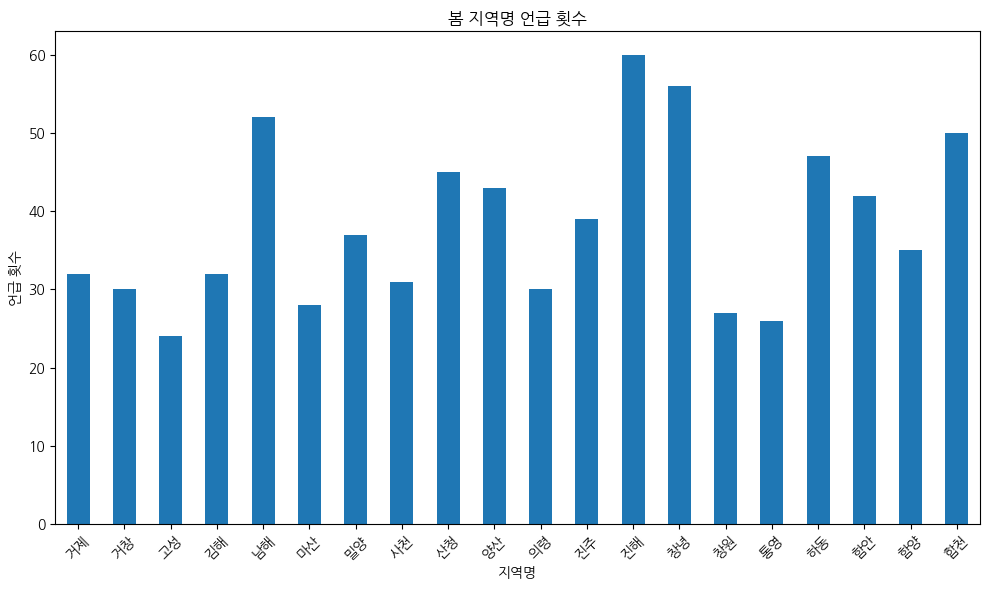

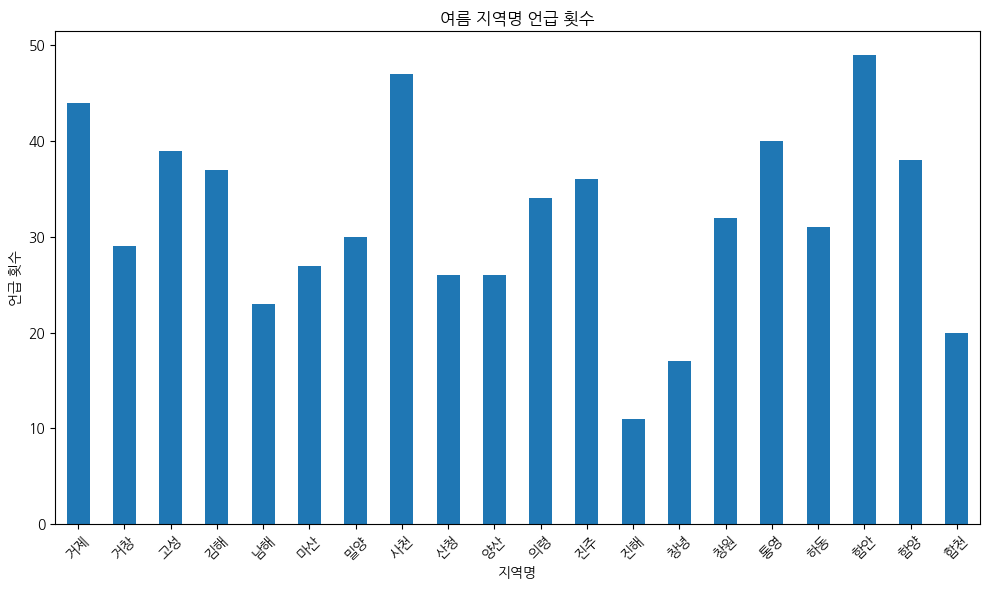

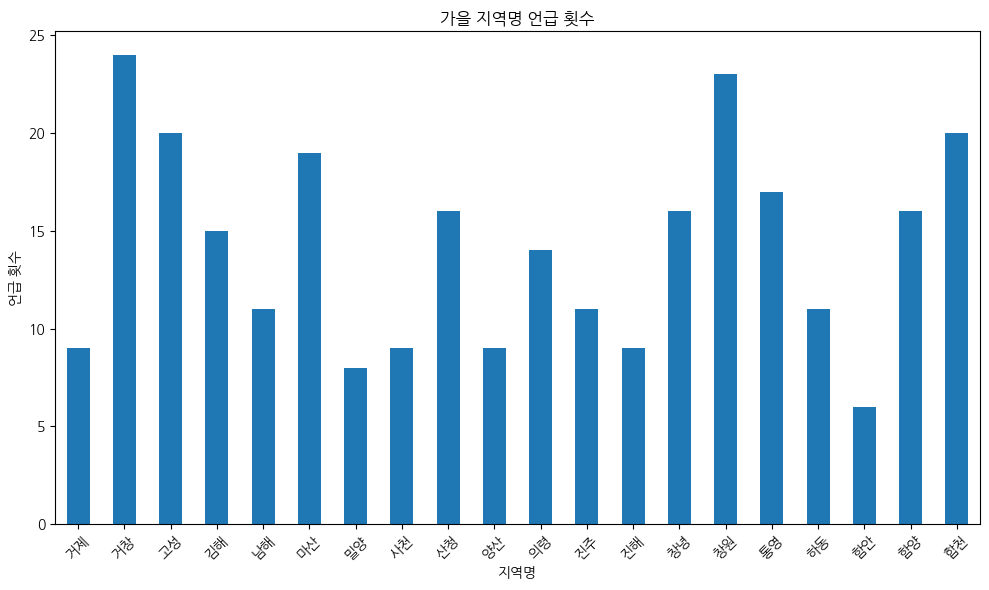

In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 및 처리
data = pd.read_csv('/home/kng/kng/CRAWLER/blog_filtered.csv')

# 날짜를 datetime 형식으로 변환하고 월 추출
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data['month'] = data['date'].dt.month

# 월을 계절에 매핑
def month_to_season(month):
    if month in [12, 1, 2]:
        return '겨울'
    elif month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    else:
        return '가을'

data['season'] = data['month'].apply(month_to_season)

# 계절별 지역명 언급 횟수 계산
seasonal_region_counts = data.groupby(['season', 'region']).size().unstack(fill_value=0)

# 각 계절에 대한 그래프 생성
seasons = ['겨울', '봄', '여름', '가을']
for season in seasons:
    plt.figure(figsize=(10, 6))
    seasonal_region_counts.loc[season].plot(kind='bar')
    plt.title(f'{season} 지역명 언급 횟수')
    plt.xlabel('지역명')
    plt.ylabel('언급 횟수')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [176]:
# 지역별 단어 빈도수를 계산
regions = words_df['region'].unique()
result = []

for region in regions:
    region_df = words_df[words_df['region'] == region]
    all_nouns = [noun for sublist in region_df['nouns'] for noun in sublist]
    noun_counts = Counter(all_nouns)
    top_nouns = noun_counts.most_common(10)
    top_nouns_str = ', '.join([word for word, freq in top_nouns])
    result.append({'region': region, 'top_words': top_nouns_str})

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(result)

# CSV 파일로 저장
result_df.to_csv('region_top_words.csv', index=False)

print("지역별 상위 10개 단어가 한 행으로 'region_top_words.csv' 파일에 저장되었습니다.")

지역별 상위 10개 단어가 한 행으로 'region_top_words.csv' 파일에 저장되었습니다.
